In [1]:
def experiment(X, y):
    # 1. Получение важности из Sklearn и rfpimp (Возвращает (Series, RF_model, Optuna_study))
    imp_sklearn, imp_rfpimp, _, study = sklearn_importance(X, y)
    best_params = study.best_params
    print(f'best_params: {best_params}')
    print(f'the importance of sklearn: {imp_sklearn}')
    print(f'the importance of rfpimp: {imp_rfpimp}')
    # 2. Получение важности из R randomForest (Возвращает Series)
    imp_r_rf = r_randomforest_importance(X, y, **best_params)
    print(f'the importance of  R_randomForest: {imp_r_rf}')
    # 3. Получение важности из R ranger (Возвращает Series)
    imp_r_ranger = r_ranger_importance_air(X, y, **best_params)
    print(f'the importance of R_range: {imp_r_ranger}')
    # 4. Получение важности из randomForestSRC (Возвращает Series)
    imp_r_src = r_randomforestsrc_importance(X, y, **best_params)
    print(f'the importance of randomForestSRC: {imp_r_src}')

    # 5. Получение важности из r_party_cforest (Возвращает Series)
    imp_r_party = r_party_cforest_importance_classification(
        X, y, **best_params)
    print(f'the importance of r_party_cforest: {imp_r_party}')

    imp_r_partykit = r_partykit_importance(X, y, **best_params)
    print(f'the importance of r_partykit: {imp_r_partykit}')

    # Фильтруем None на случай сбоя R-функции и формируем списки
    importance_series_list = []
    titles_list = []

    importance_series_list.append(imp_sklearn)
    titles_list.append('Sklearn(MDI)')

    importance_series_list.append(imp_rfpimp)
    titles_list.append('Rfpimp(MDA)')

    importance_series_list.append(imp_r_rf)
    titles_list.append('R_RF(MDI)')

    importance_series_list.append(imp_r_ranger)
    titles_list.append('R_Ranger(Modified MDI)')

    importance_series_list.append(imp_r_src)
    titles_list.append('RFSRC(Modified MDA)')

    importance_series_list.append(imp_r_party)
    titles_list.append('Party(MDA)')

    importance_series_list.append(imp_r_partykit)
    titles_list.append('Partykit(MDA)')

    picture(importance_series_list, titles_list)
    return importance_series_list

<font size="8">Import the necessary libraries and load the dataset.</font>

In [2]:
import pandas as pd
from importance_lib.pic import picture
from importance_lib.python_implementations import sklearn_importance
import numpy as np
from importance_lib.r_implementations import r_partykit_importance, r_randomforest_importance, r_ranger_importance_air, r_party_cforest_importance_classification, r_randomforestsrc_importance
import random

data = pd.read_csv("rent.csv")
features = data.columns[:5].tolist()
X, y = data[features], data["interest_level"]

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


<font size="8">Source features.</font>

[I 2025-12-23 16:31:49,586] A new study created in memory with name: no-name-17361c0d-6fae-4e2c-ba2e-b2d8c61675e4
[I 2025-12-23 16:31:50,249] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 113, 'max_depth': 1, 'min_samples_leaf': 13, 'max_features': 0.7}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-23 16:31:50,889] Trial 1 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 129, 'max_depth': 1, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-23 16:31:51,675] Trial 2 finished with value: 0.7006154859299409 and parameters: {'n_estimators': 134, 'max_depth': 8, 'min_samples_leaf': 12, 'max_features': 0.25}. Best is trial 2 with value: 0.7006154859299409.
[I 2025-12-23 16:31:51,865] Trial 3 finished with value: 0.7000329272308199 and parameters: {'n_estimators': 26, 'max_depth': 3, 'min_samples_leaf': 20, 'max_features': 1.0}. Best is trial 2 with value: 0.700615

{'n_estimators': 84, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 0.5}
best_params: {'n_estimators': 84, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 0.5}
the importance of sklearn: price        0.384296
latitude     0.232313
longitude    0.221821
bedrooms     0.127559
bathrooms    0.034011
dtype: float64
the importance of rfpimp: price        0.125013
bedrooms     0.083173
longitude    0.024921
latitude     0.024111
bathrooms    0.003242
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Importance matrix shape: (5, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4445.324251
latitude     3133.300909
longitude    3096.669148
bedrooms     1051.585381
bathrooms     306.806562
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude
Successfully computed variable importance for CLASSIFICATION
the import

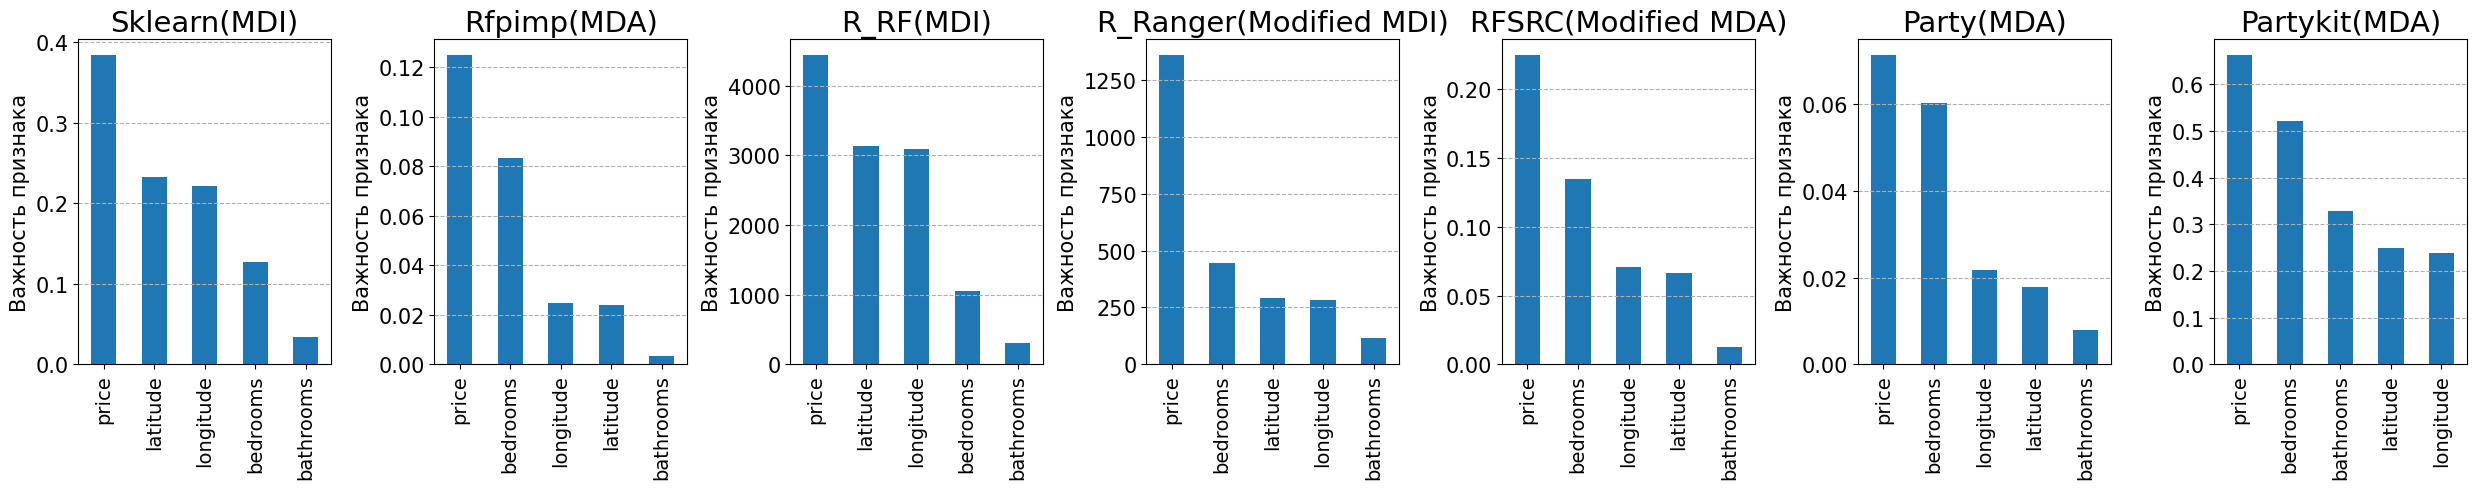

In [3]:
importance_series_list_1 = experiment(X, y)

In [4]:
importance_series_list_1

[price        0.384296
 latitude     0.232313
 longitude    0.221821
 bedrooms     0.127559
 bathrooms    0.034011
 dtype: float64,
 price        0.125013
 bedrooms     0.083173
 longitude    0.024921
 latitude     0.024111
 bathrooms    0.003242
 dtype: float64,
 price        4445.324251
 latitude     3133.300909
 longitude    3096.669148
 bedrooms     1051.585381
 bathrooms     306.806562
 dtype: float64,
 price        1359.096281
 bedrooms      446.125259
 latitude      293.037684
 longitude     283.285653
 bathrooms     114.610184
 dtype: float64,
 price        0.225180
 bedrooms     0.134509
 longitude    0.070601
 latitude     0.066409
 bathrooms    0.012654
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.071328
 bedrooms     0.060242
 longitude    0.021714
 latitude     0.017823
 bathrooms    0.007931
 Name: party_cforest_importance, dtype: float64,
 price        0.663430
 bedrooms     0.522303
 bathrooms    0.327955
 latitude     0.250260
 longitude    0.238542
 Na

<font size="8">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

In [5]:
X["random_uniform"] = np.random.uniform(
    0, 1, size=len(X))  # равномерное распределение
X["random_normal"] = np.random.normal(
    0, 1, size=len(X))  # нормальное распределение
X["random_int"] = np.random.randint(0, 100, size=len(X))  # целые числа 0-99
X["random_binary"] = np.random.choice([0, 1], size=len(X))  # бинарные значения

[I 2025-12-23 16:45:21,328] A new study created in memory with name: no-name-9f622d95-eb7a-40a0-95eb-f2dc3c4e17a4
[I 2025-12-23 16:45:21,877] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 93, 'max_depth': 1, 'min_samples_leaf': 17, 'max_features': 0.25}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-23 16:45:22,943] Trial 1 finished with value: 0.6998809553962666 and parameters: {'n_estimators': 137, 'max_depth': 3, 'min_samples_leaf': 16, 'max_features': 0.7}. Best is trial 1 with value: 0.6998809553962666.
[I 2025-12-23 16:45:24,187] Trial 2 finished with value: 0.7042374813201286 and parameters: {'n_estimators': 127, 'max_depth': 12, 'min_samples_leaf': 3, 'max_features': 0.25}. Best is trial 2 with value: 0.7042374813201286.
[I 2025-12-23 16:45:24,417] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 38, 'max_depth': 1, 'min_samples_leaf': 6, 'max_features': 0.25}. Best is trial 2 with value: 0.70423748

{'n_estimators': 129, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.7}
best_params: {'n_estimators': 129, 'max_depth': 12, 'min_samples_leaf': 19, 'max_features': 0.7}
the importance of sklearn: price             0.369891
latitude          0.150335
longitude         0.148370
bedrooms          0.146547
random_normal     0.056703
random_uniform    0.056305
random_int        0.046582
bathrooms         0.017632
random_binary     0.007634
dtype: float64
the importance of rfpimp: price             0.115389
bedrooms          0.062810
longitude         0.025529
latitude          0.012258
random_normal     0.002026
random_int        0.001722
bathrooms         0.001621
random_uniform    0.001013
random_binary     0.000101
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random_uniform + random_normal + random_int + random_binary
Importance matrix shape: (9, 1)
Successfully computed variable importance
the importance

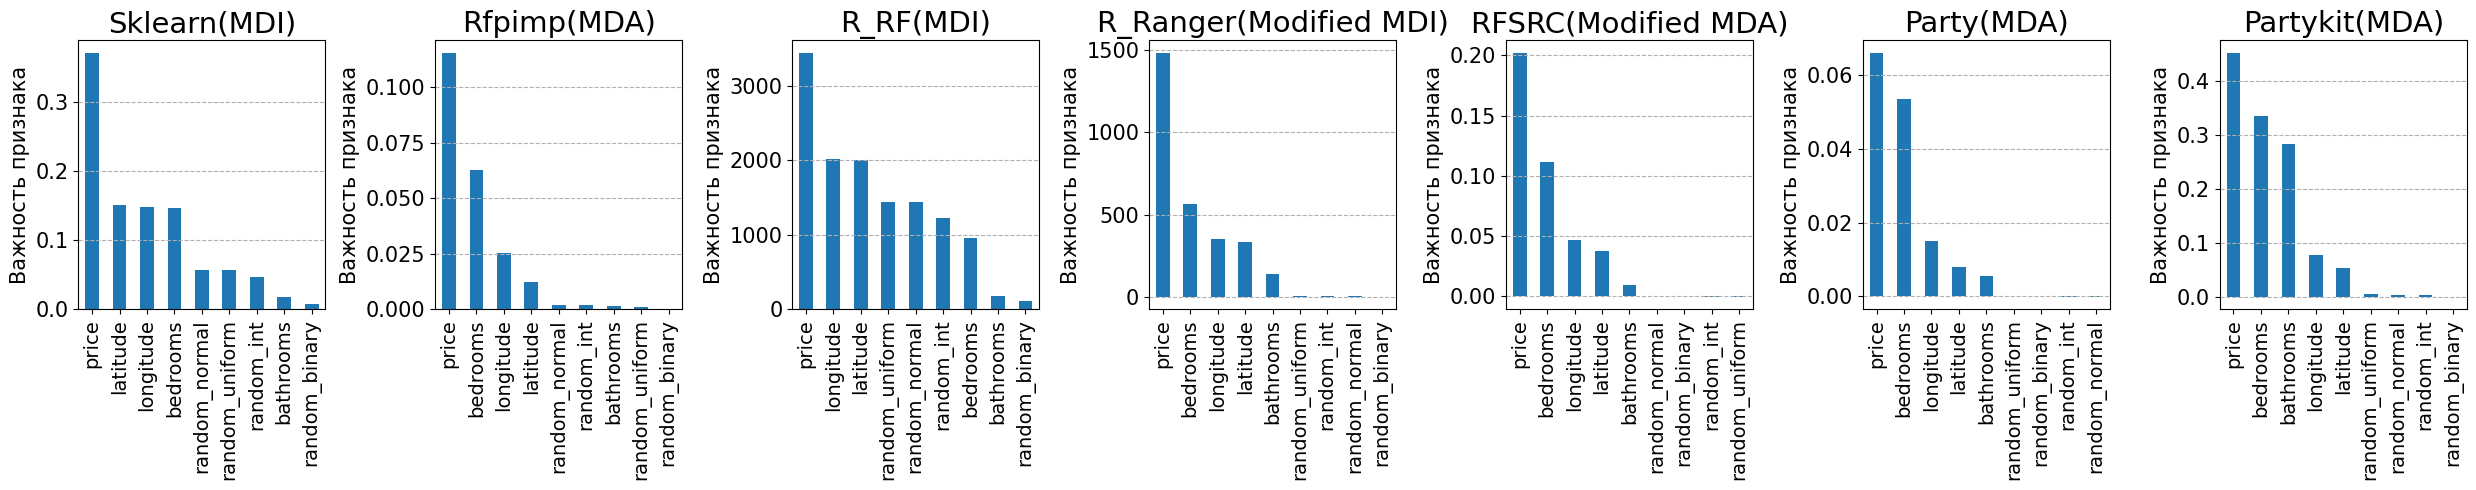

In [6]:
importance_series_list_2 = experiment(X, y)

In [7]:
importance_series_list_2

[price             0.369891
 latitude          0.150335
 longitude         0.148370
 bedrooms          0.146547
 random_normal     0.056703
 random_uniform    0.056305
 random_int        0.046582
 bathrooms         0.017632
 random_binary     0.007634
 dtype: float64,
 price             0.115389
 bedrooms          0.062810
 longitude         0.025529
 latitude          0.012258
 random_normal     0.002026
 random_int        0.001722
 bathrooms         0.001621
 random_uniform    0.001013
 random_binary     0.000101
 dtype: float64,
 price             3437.927796
 longitude         2015.836778
 latitude          2009.093704
 random_uniform    1443.218886
 random_normal     1440.699045
 random_int        1222.172234
 bedrooms           961.595514
 bathrooms          174.760315
 random_binary      115.958833
 dtype: float64,
 price             1486.825237
 bedrooms           565.577385
 longitude          350.053171
 latitude           330.165663
 bathrooms          139.853390
 random_uni

<font size="8">Source features + copy of the 'price' feature.</font>

In [8]:
X = X.drop(["random_int", "random_binary",
           "random_uniform", "random_normal"], axis=1)

X["price1"] = X["price"]
X["price2"] = X["price"]
X["price3"] = X["price"]

[I 2025-12-23 17:38:44,551] A new study created in memory with name: no-name-011b9c81-cab7-45ef-a384-457a8d4b9f36
[I 2025-12-23 17:38:44,892] Trial 0 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 46, 'max_depth': 1, 'min_samples_leaf': 6, 'max_features': 0.5}. Best is trial 0 with value: 0.6962589600060789.
[I 2025-12-23 17:38:45,144] Trial 1 finished with value: 0.6995770117271599 and parameters: {'n_estimators': 31, 'max_depth': 3, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.6995770117271599.
[I 2025-12-23 17:38:45,825] Trial 2 finished with value: 0.6976267065170588 and parameters: {'n_estimators': 99, 'max_depth': 2, 'min_samples_leaf': 3, 'max_features': 0.3333333333333333}. Best is trial 1 with value: 0.6995770117271599.
[I 2025-12-23 17:38:46,412] Trial 3 finished with value: 0.7125452749423773 and parameters: {'n_estimators': 40, 'max_depth': 12, 'min_samples_leaf': 20, 'max_features': 0.7}. Best is trial 3 with valu

{'n_estimators': 69, 'max_depth': 13, 'min_samples_leaf': 11, 'max_features': 0.7}
best_params: {'n_estimators': 69, 'max_depth': 13, 'min_samples_leaf': 11, 'max_features': 0.7}
the importance of sklearn: latitude     0.218488
longitude    0.216106
bedrooms     0.144672
price1       0.107801
price        0.107279
price3       0.096370
price2       0.096112
bathrooms    0.013171
dtype: float64
the importance of rfpimp: bedrooms     0.084895
longitude    0.030595
latitude     0.018337
price1       0.009624
price        0.008307
price2       0.008105
price3       0.006990
bathrooms    0.002229
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + price1 + price2 + price3
Importance matrix shape: (8, 1)
Successfully computed variable importance
the importance of  R_randomForest: longitude    3674.714572
latitude     3670.037355
price2       1366.822547
price        1272.416399
price3       1229.805930
price1       1198.814864


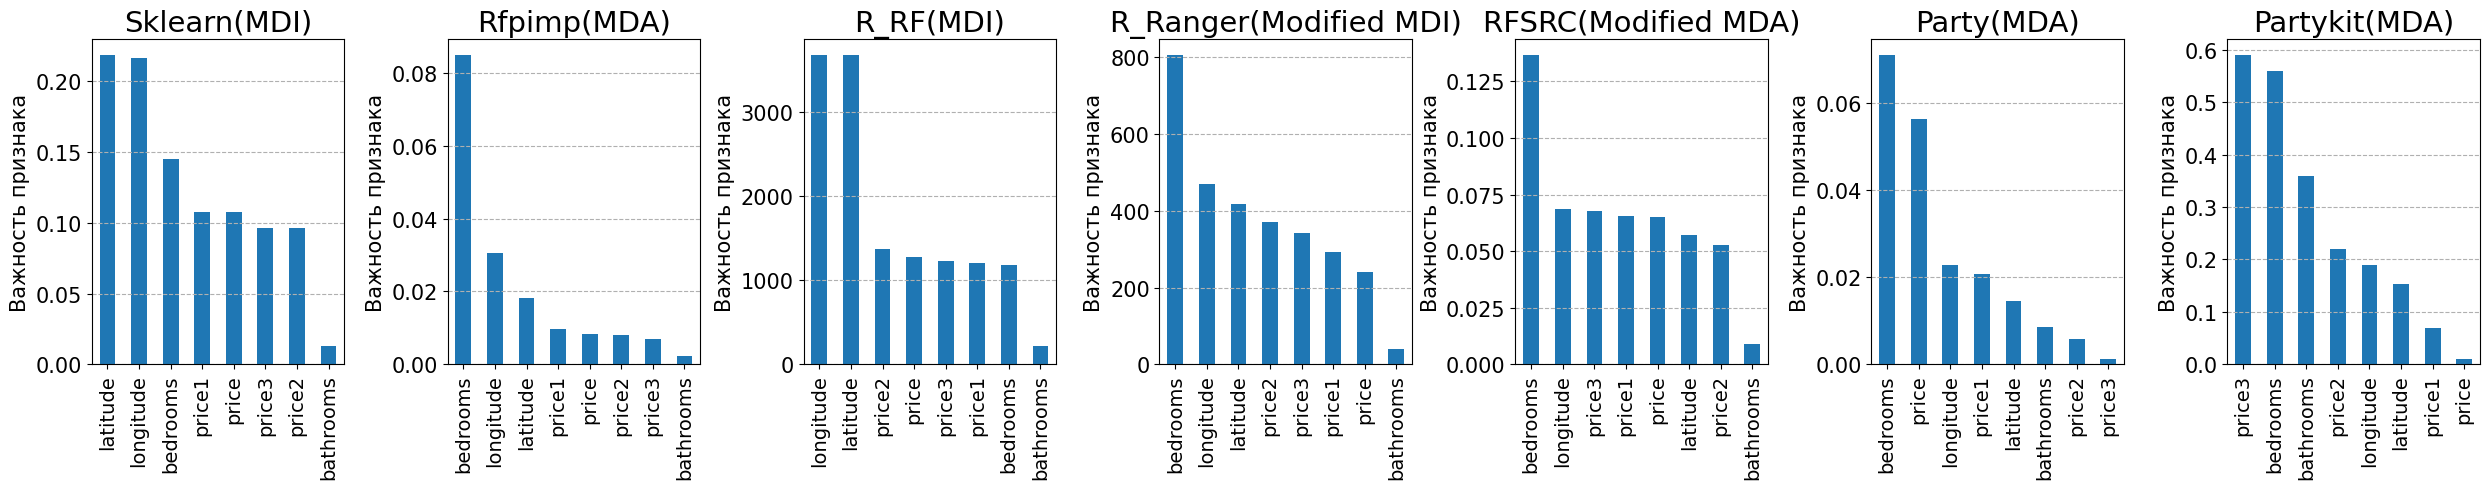

In [9]:
importance_series_list_3 = experiment(X, y)

In [10]:
importance_series_list_3

[latitude     0.218488
 longitude    0.216106
 bedrooms     0.144672
 price1       0.107801
 price        0.107279
 price3       0.096370
 price2       0.096112
 bathrooms    0.013171
 dtype: float64,
 bedrooms     0.084895
 longitude    0.030595
 latitude     0.018337
 price1       0.009624
 price        0.008307
 price2       0.008105
 price3       0.006990
 bathrooms    0.002229
 dtype: float64,
 longitude    3674.714572
 latitude     3670.037355
 price2       1366.822547
 price        1272.416399
 price3       1229.805930
 price1       1198.814864
 bedrooms     1175.022432
 bathrooms     218.827492
 dtype: float64,
 bedrooms     805.930212
 longitude    469.890605
 latitude     417.576865
 price2       369.468341
 price3       341.221476
 price1       292.618115
 price        241.630437
 bathrooms     40.003113
 dtype: float64,
 bedrooms     0.136753
 longitude    0.068715
 price3       0.067877
 price1       0.065749
 price        0.064900
 latitude     0.057210
 price2       0.05

<font size="8">Initial features + random feature random.</font>

In [11]:
X = X.drop(["price1", "price2", "price3"], axis=1)
X["random"] = np.random.random(size=len(X))

[I 2025-12-23 18:04:50,266] A new study created in memory with name: no-name-7c00e802-63b4-49e9-8551-48c3a57391fc
[I 2025-12-23 18:04:50,842] Trial 0 finished with value: 0.6978546642688889 and parameters: {'n_estimators': 86, 'max_depth': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.6978546642688889.
[I 2025-12-23 18:04:51,538] Trial 1 finished with value: 0.7001848990653732 and parameters: {'n_estimators': 103, 'max_depth': 5, 'min_samples_leaf': 11, 'max_features': 'sqrt'}. Best is trial 1 with value: 0.7001848990653732.
[I 2025-12-23 18:04:51,837] Trial 2 finished with value: 0.7066690306729819 and parameters: {'n_estimators': 28, 'max_depth': 8, 'min_samples_leaf': 7, 'max_features': 0.5}. Best is trial 2 with value: 0.7066690306729819.
[I 2025-12-23 18:04:52,587] Trial 3 finished with value: 0.6962589600060789 and parameters: {'n_estimators': 133, 'max_depth': 1, 'min_samples_leaf': 15, 'max_features': 0.5}. Best is trial 2 with value: 0.706669

{'n_estimators': 131, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 1.0}
best_params: {'n_estimators': 131, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 1.0}
the importance of sklearn: price        0.348121
longitude    0.200122
latitude     0.197573
random       0.125319
bedrooms     0.117934
bathrooms    0.010933
dtype: float64
the importance of rfpimp: price        0.142032
bedrooms     0.082970
longitude    0.028163
latitude     0.022085
bathrooms    0.000709
random      -0.001317
dtype: float64
Training R Random Forest with formula: target ~ bathrooms + bedrooms + price + longitude + latitude + random
Importance matrix shape: (6, 1)
Successfully computed variable importance
the importance of  R_randomForest: price        4269.240740
random       3462.590635
longitude    3150.626434
latitude     3101.974371
bedrooms     1037.625522
bathrooms     185.989439
dtype: float64
Training R Ranger Forest with formula: target ~ bathrooms + bedrooms + price + longitude 

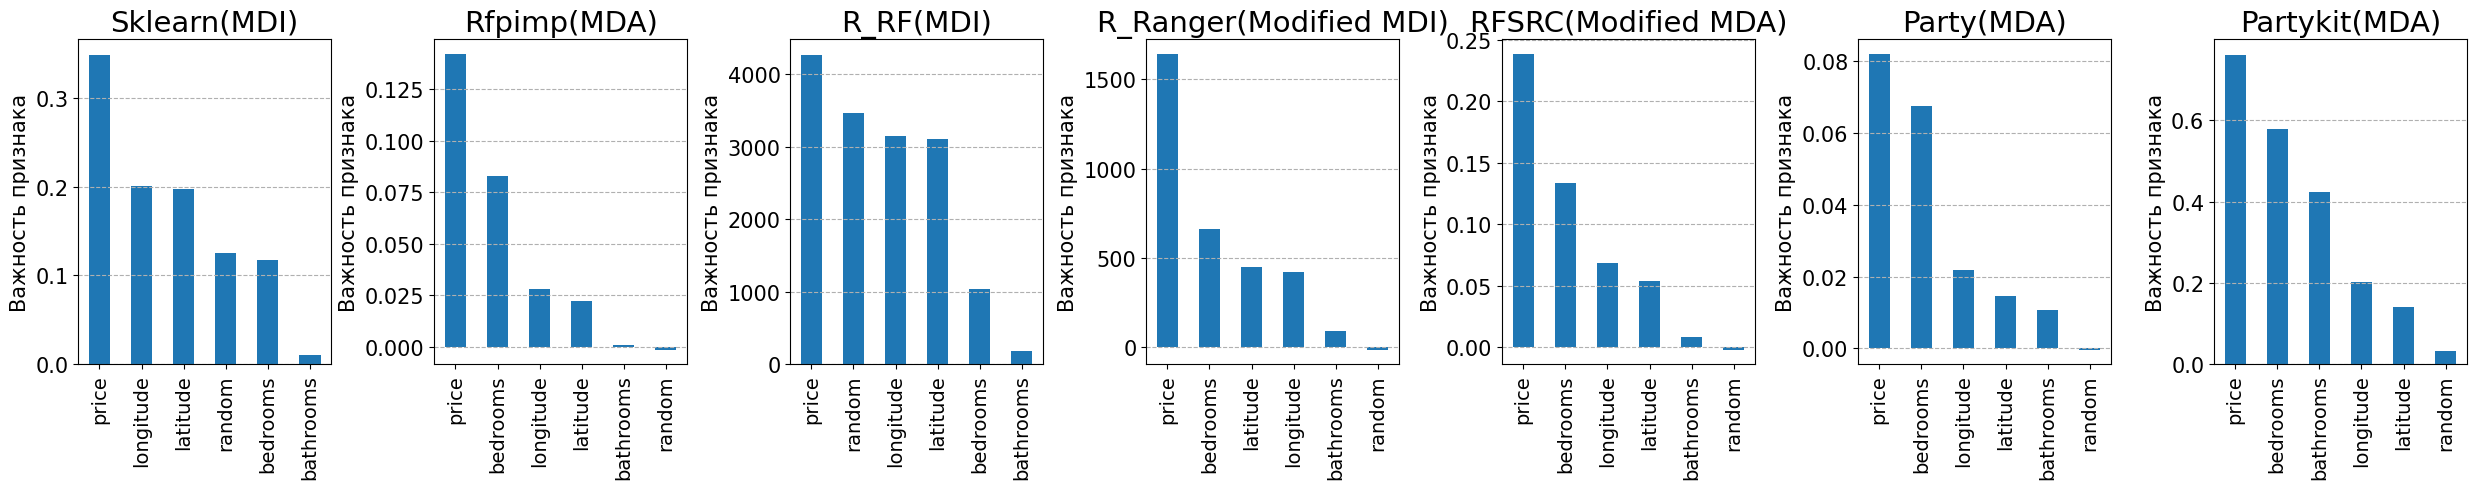

In [12]:
importance_series_list_4 = experiment(X, y)

In [13]:
importance_series_list_4

[price        0.348121
 longitude    0.200122
 latitude     0.197573
 random       0.125319
 bedrooms     0.117934
 bathrooms    0.010933
 dtype: float64,
 price        0.142032
 bedrooms     0.082970
 longitude    0.028163
 latitude     0.022085
 bathrooms    0.000709
 random      -0.001317
 dtype: float64,
 price        4269.240740
 random       3462.590635
 longitude    3150.626434
 latitude     3101.974371
 bedrooms     1037.625522
 bathrooms     185.989439
 dtype: float64,
 price        1641.971473
 bedrooms      662.125990
 latitude      446.335142
 longitude     422.454066
 bathrooms      86.829773
 random        -15.393014
 dtype: float64,
 price        0.238178
 bedrooms     0.133174
 longitude    0.068141
 latitude     0.053906
 bathrooms    0.008381
 random      -0.001993
 Name: randomForestSRC_VIMP, dtype: float64,
 price        0.082022
 bedrooms     0.067450
 longitude    0.021716
 latitude     0.014585
 bathrooms    0.010621
 random      -0.000353
 Name: party_cforest_im

<font size="8">Rendering all cases.</font>

<font size="4">Source features.</font>

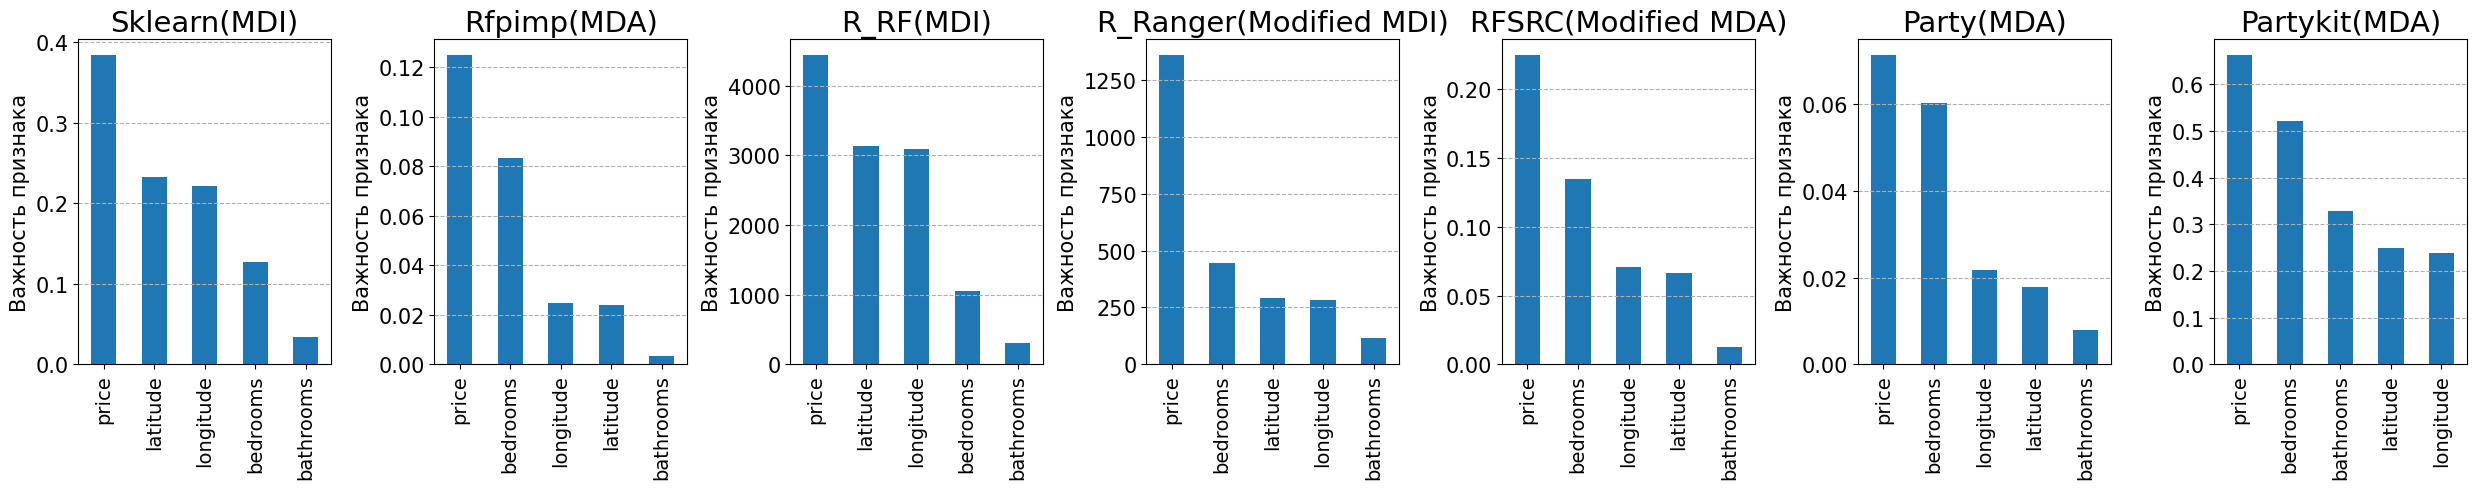

In [14]:
titles_list = ['Sklearn(MDI)', 'Rfpimp(MDA)', 'R_RF(MDI)',
               'R_Ranger(Modified MDI)', 'RFSRC(Modified MDA)', 'Party(MDA)', 'Partykit(MDA)']

picture(importance_series_list_1, titles_list)


<font size="4">Initial features + different types of random features (random_uniform, random_normal, random_int, random_binary).</font>

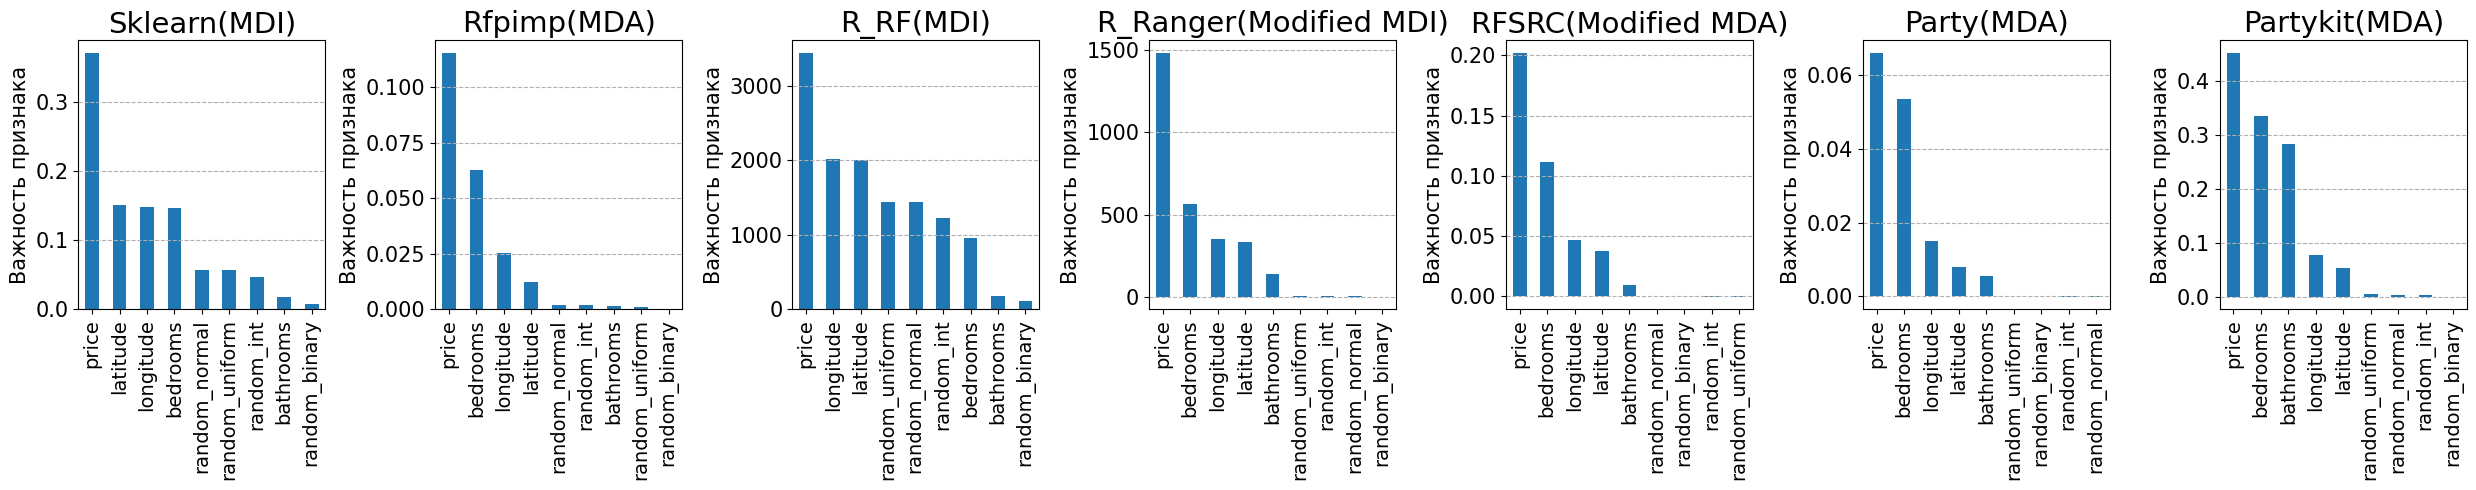

In [15]:
picture(importance_series_list_2, titles_list)

<font size="4">Source features + copy of the 'price' feature.</font>

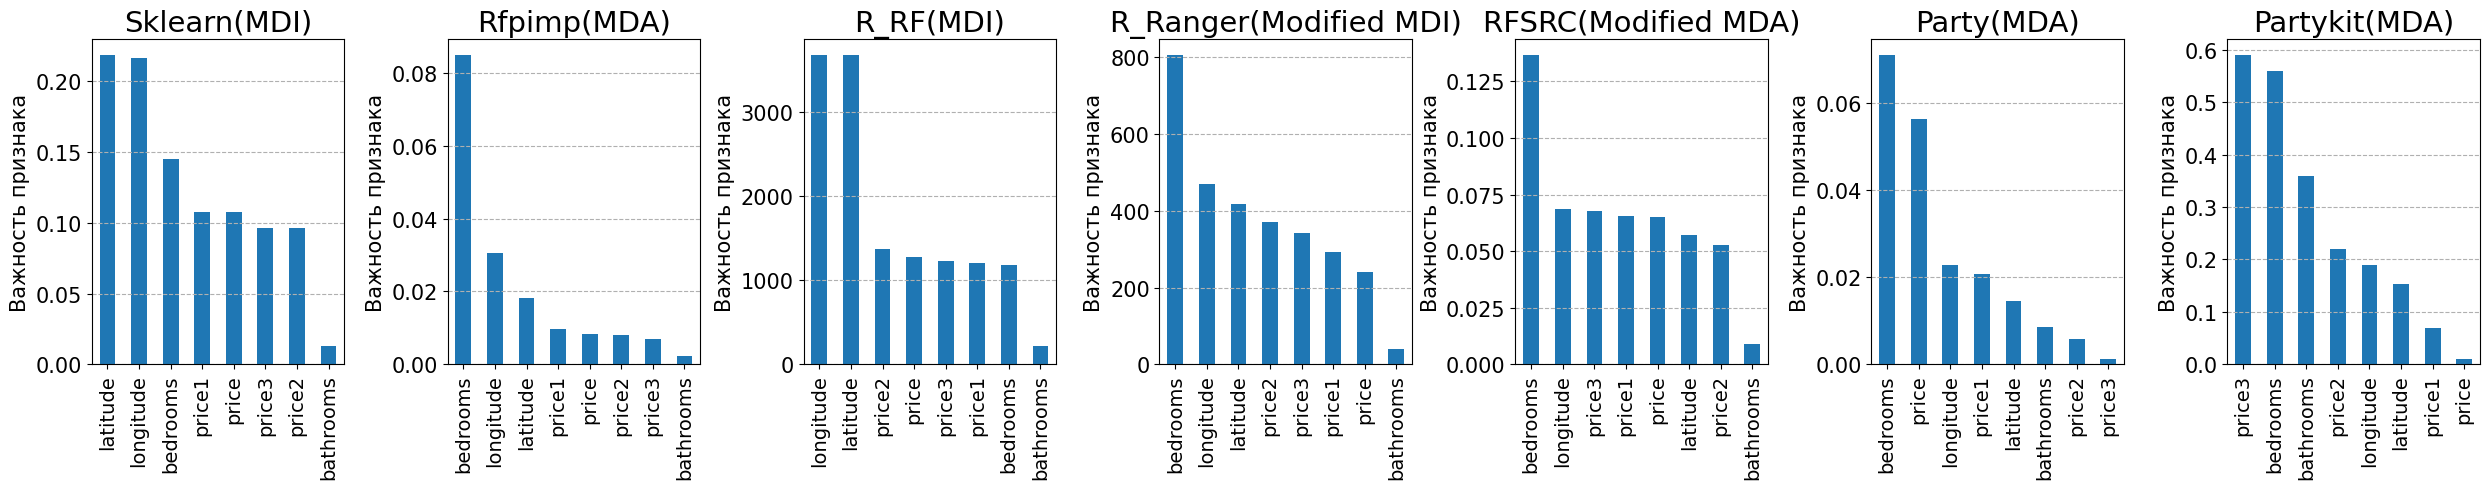

In [16]:
picture(importance_series_list_3, titles_list)

<font size="4">Initial features + random feature random.</font>

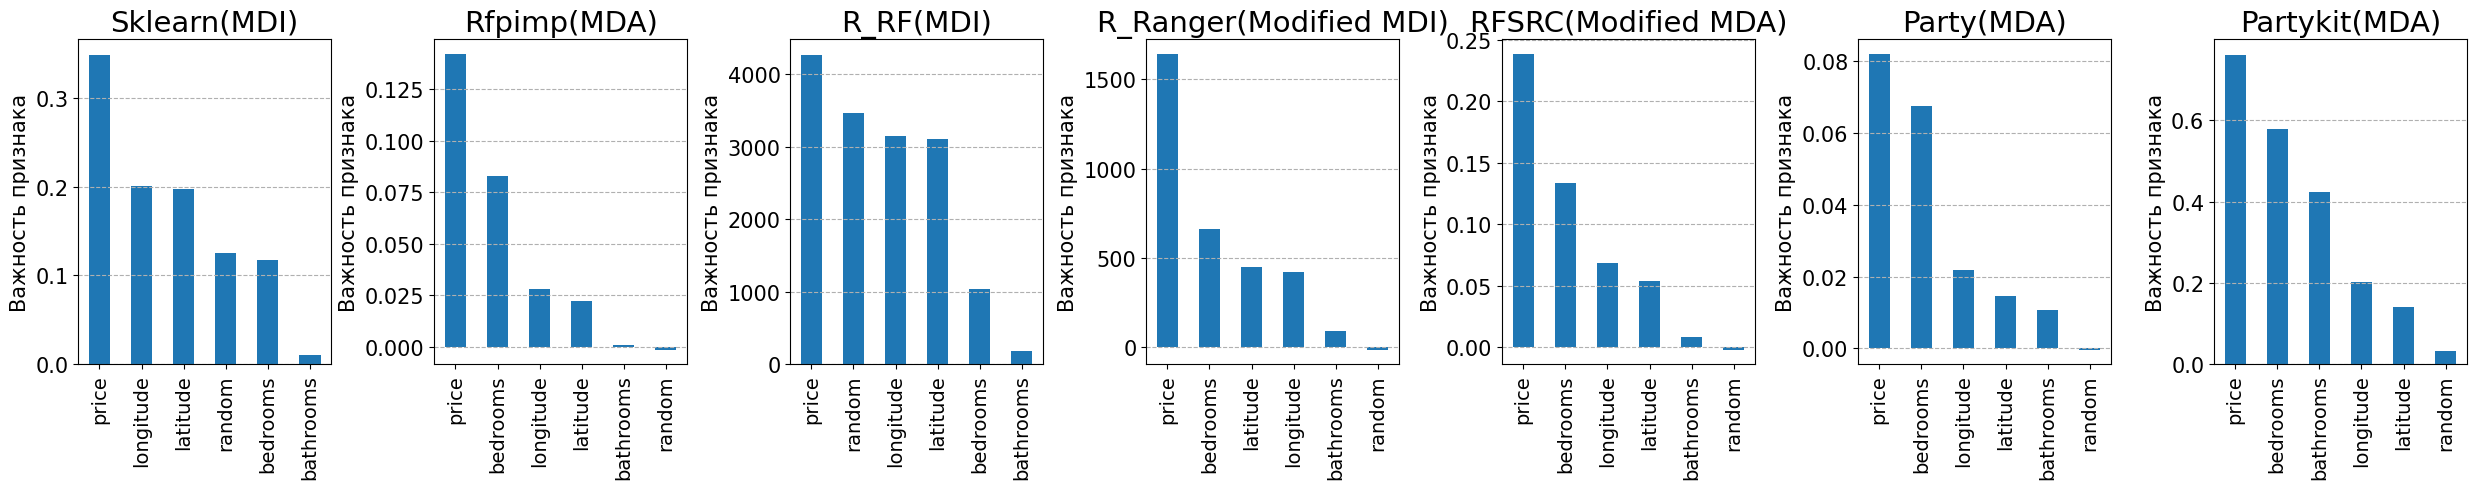

In [21]:
picture(importance_series_list_4, titles_list)